In [7]:
import os
import tarfile
from six.moves import urllib

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

FILE_TO_DOWNLOAD =  "Salary_Data.csv"
DOWNLOAD_ROOT = "https://github.com/ect-info/ml/raw/master/"
DATA_PATH = "dados/"
DATA_URL = DOWNLOAD_ROOT + DATA_PATH + FILE_TO_DOWNLOAD

def fetch_data(data_url=DATA_URL, data_path=DATA_PATH, file_to_download=FILE_TO_DOWNLOAD):
  if not os.path.isdir(data_path):
    os.makedirs(data_path)
  urllib.request.urlretrieve(data_url, data_path+"Salary_Data.csv")
  
  
fetch_data()

# observando se o diretório datasets foi criado com sucesso 
!ls dados

Salary_Data.csv


In [8]:
import pandas as pd

def load_data(data_path=DATA_PATH, file_to_download=FILE_TO_DOWNLOAD):
  csv_path = os.path.join(data_path,file_to_download)
  return pd.read_csv(csv_path)

salary_data = load_data()
 
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [0]:
#print(salary_data)
#type(salary_data)
#print(salary_data.Salary)
salary_randomizado = salary_data.sample(frac=1)
salary_treino = salary_randomizado.Salary[:-15]
salary_test = salary_randomizado.Salary[15:]

years_treino = salary_randomizado.YearsExperience[:-15]
years_test = salary_randomizado.YearsExperience[15:]
#print(years_treino)
#print(years_test)
#print(salary_randomizado)

In [10]:
years_treino_ajustado = years_treino.reshape(-1,1)
salary_treino_ajustado = salary_treino.reshape(-1,1)

years_test_ajustado = years_test.reshape(-1,1)
salary_test_ajustado = salary_test.reshape(-1,1)

#print(years_treino_ajustado)
regressao = linear_model.LinearRegression()
regressao.fit(years_treino_ajustado, salary_treino_ajustado)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [0]:
#salary_saida = regressao.predict(salary_test_ajustado)

salary_saida = regressao.predict(years_test_ajustado)

In [16]:
# The coefficients
print('Coefficients: \n', regressao.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(salary_test_ajustado, salary_saida))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(salary_test_ajustado, salary_saida))

Coefficients: 
 [[9954.543042]]
Mean squared error: 36582304.83
Variance score: 0.95


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


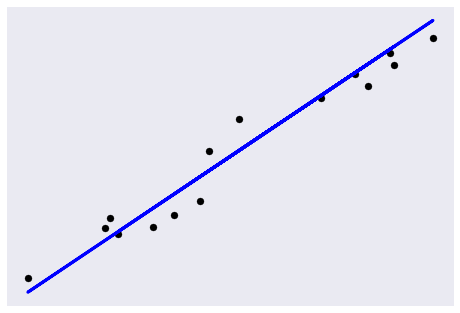

In [13]:
# Plot outputs
plt.scatter(years_test.reshape(-1,1), salary_test.reshape(-1,1),  color='black')
plt.plot(years_test.reshape(-1,1), salary_saida, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [14]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000
